# Arithmetic and Bitwise Operations

- Arithmetic Operations
- Bitwise Operations

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [7]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/chinese_art/Dataset/Ai_Xuan/Ai_Xuan_10.jpg'

---
### Loading data

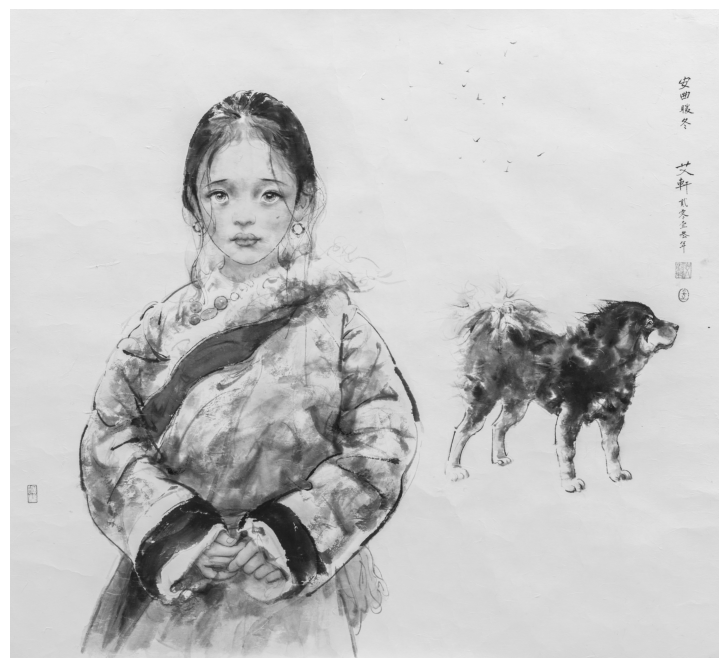

In [9]:
# the 0 leads to an grayscale image
img = cv2.imread(IMG_PATH, 0)
imshow(img)

---
### Arithmetic Operations

In [14]:
print(img)

M = np.ones(img.shape, dtype=np.uint8) * 100  # also as dtype="unit8" possible
# or:
# np.full(img.shape, 100, dtype=np.uint8)
print("\nMatrix:\n",M)

[[233 232 231 ... 239 237 237]
 [231 232 231 ... 236 237 241]
 [234 231 229 ... 239 239 239]
 ...
 [211 211 213 ... 212 209 210]
 [210 210 211 ... 213 214 213]
 [212 210 210 ... 211 211 211]]

Matrix:
 [[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


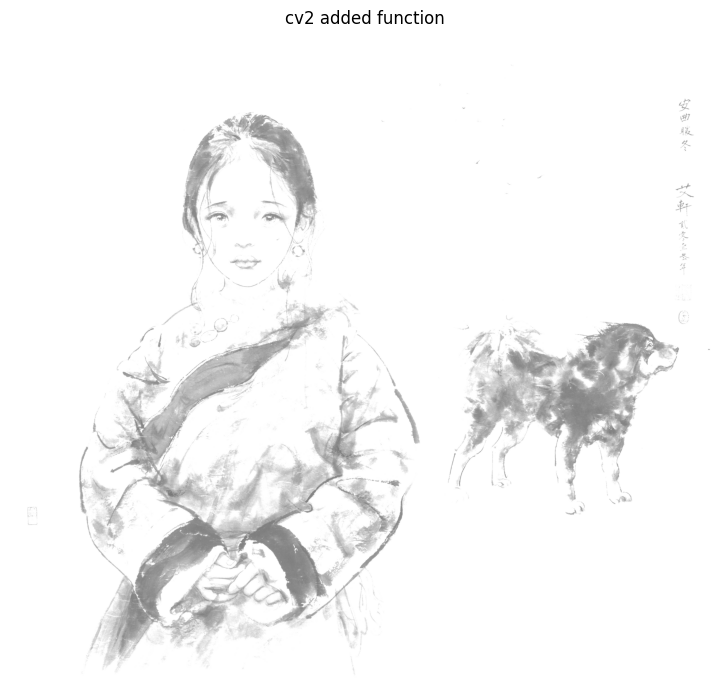

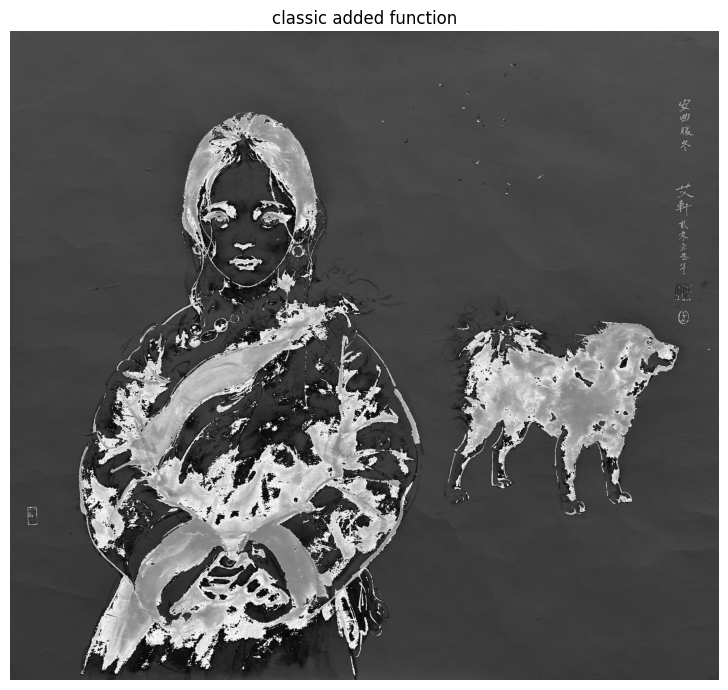

In [19]:
brighter_img = cv2.add(img, M)
imshow(brighter_img, "cv2 added function")

brighter_img_2 = img + M
imshow(brighter_img_2, "classic added function")

Just adding will lead to clips the maximum limit and this lead a bad/wrong value.

200 + 100 = 300 => 45

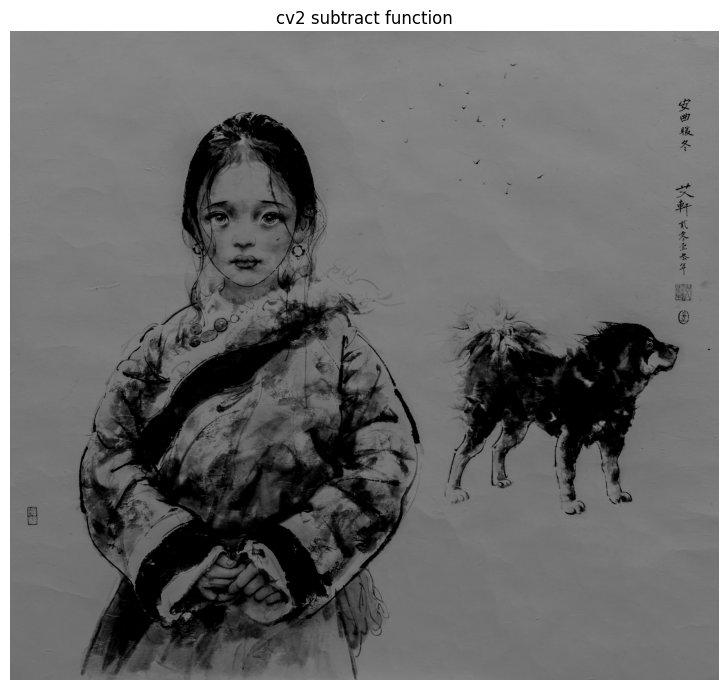

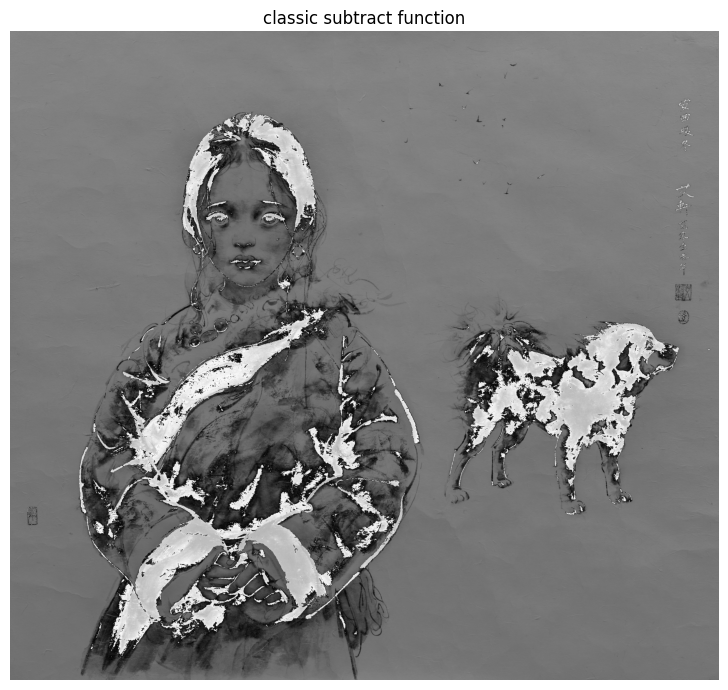

In [23]:
darker_img = cv2.subtract(img, M)
imshow(darker_img, "cv2 subtract function")

darker_img_2 = img - M
imshow(darker_img_2, "classic subtract function")

---
### Bitwise Operations

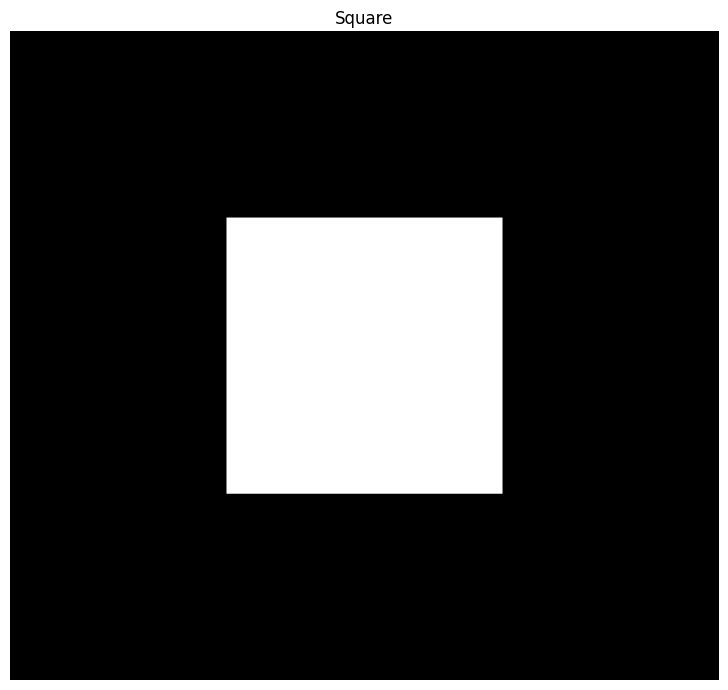

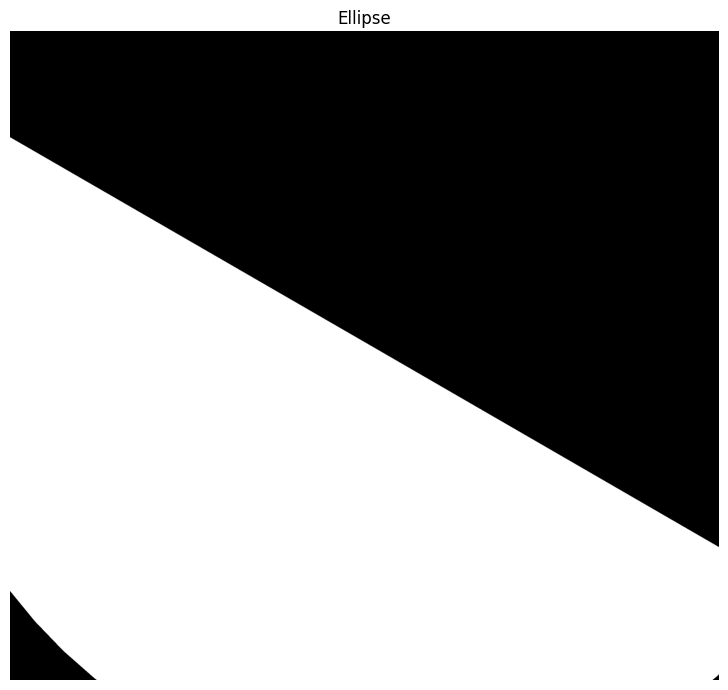

In [55]:
square_img = np.zeros(img.shape, np.uint8)
cv2.rectangle(square_img, (square_img.shape[1]//2-500, square_img.shape[0]//2-500),
                            (square_img.shape[1]//2+500, square_img.shape[0]//2+500),
                            (255, 255, 255), -1)
imshow(square_img, "Square")

# 	cv.ellipse(img, center, x-y-lentgh, angle/rotation, startAngle, endAngle, color, thickness)
ellipse_img = np.zeros(img.shape, np.uint8)
cv2.ellipse(ellipse_img, (ellipse_img.shape[1]//2+50, ellipse_img.shape[0]//2-20),
                            (int(ellipse_img.shape[1]//1.5), int(ellipse_img.shape[0]//1.5)),
                            30, 0, 180,
                            (255, 255, 255), -1)
imshow(ellipse_img, "Ellipse")

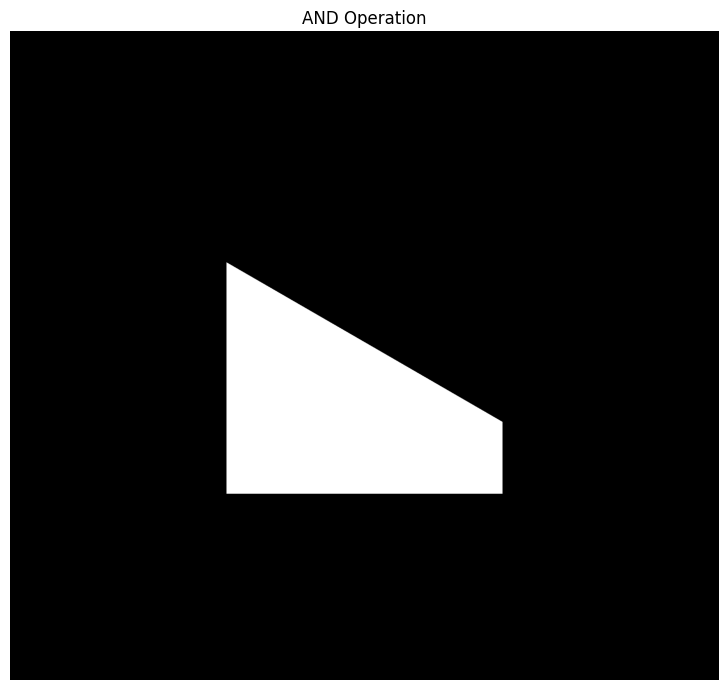

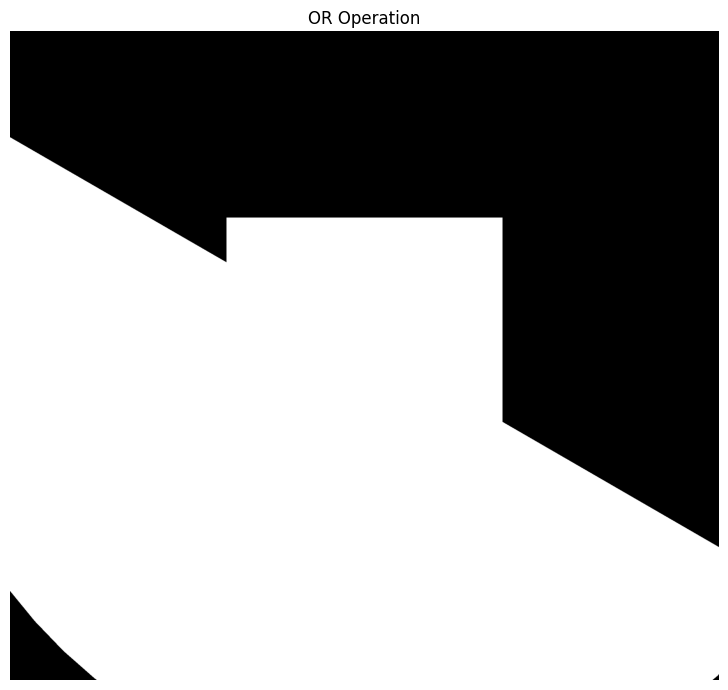

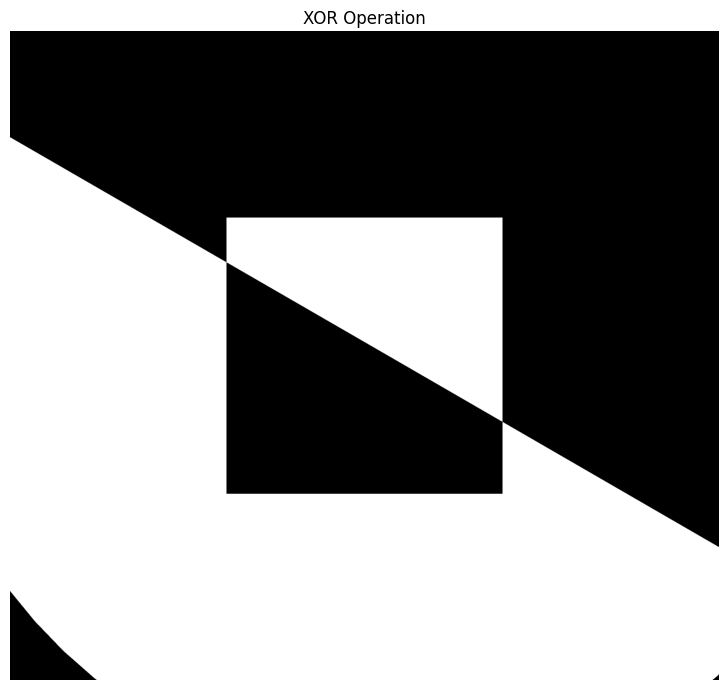

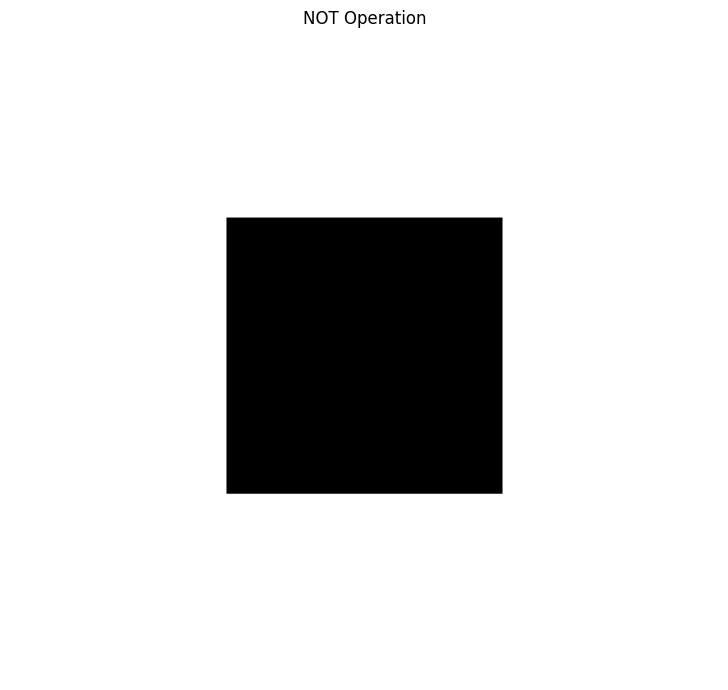

In [56]:
and_img = cv2.bitwise_and(square_img, ellipse_img)
imshow(and_img, "AND Operation")

or_img = cv2.bitwise_or(square_img, ellipse_img)
imshow(or_img, "OR Operation")

xor_img = cv2.bitwise_xor(square_img, ellipse_img)
imshow(xor_img, "XOR Operation")

not_img = cv2.bitwise_not(square_img, ellipse_img)
imshow(not_img, "NOT Operation")

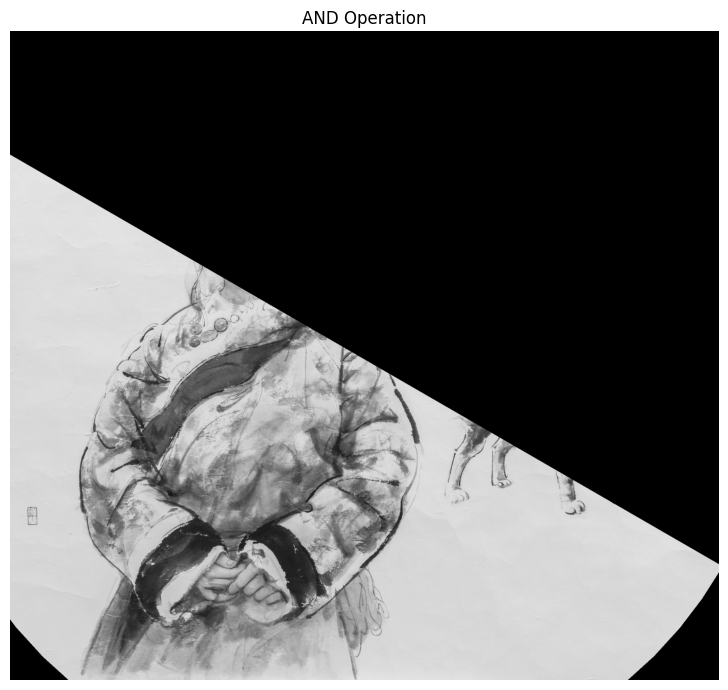

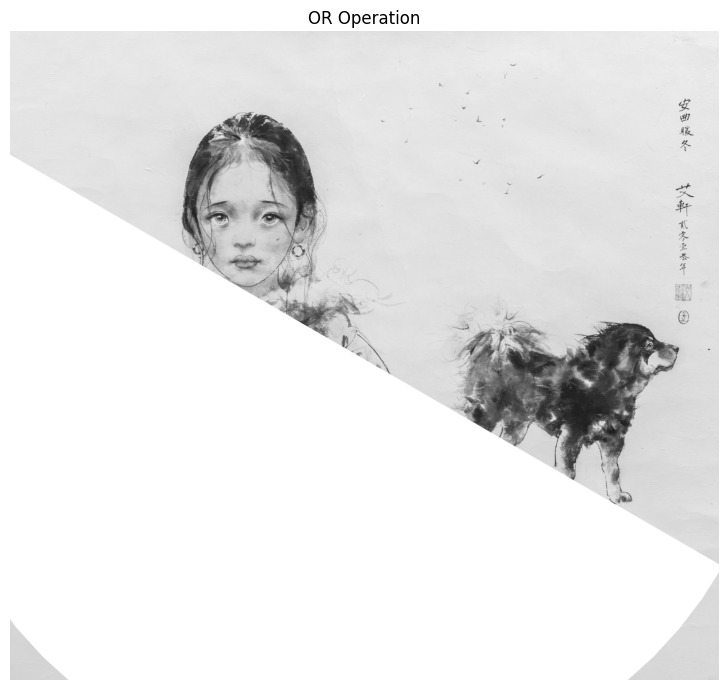

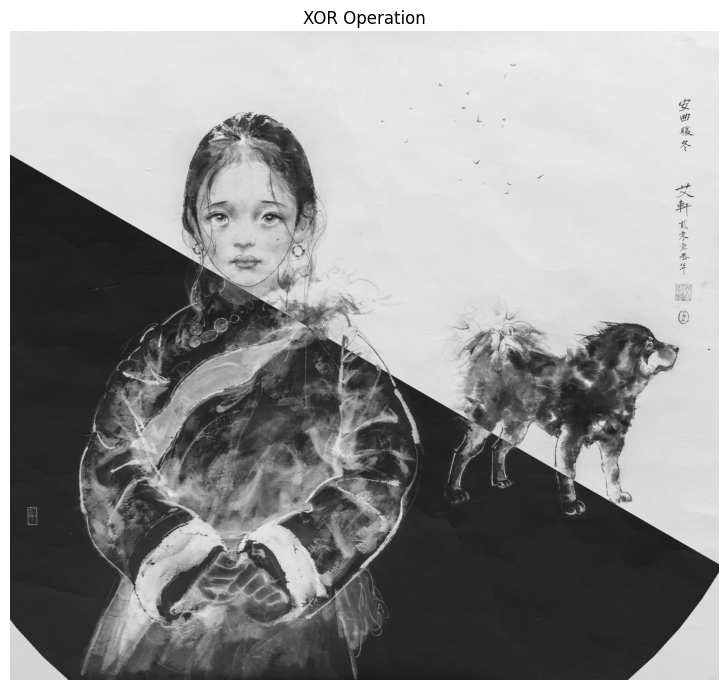

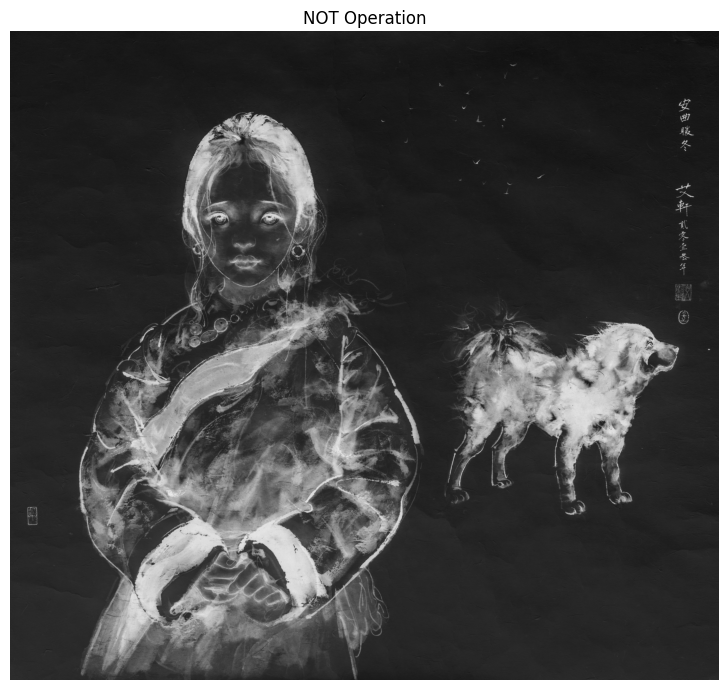

In [49]:
and_img = cv2.bitwise_and(img, ellipse_img)
imshow(and_img, "AND Operation")

or_img = cv2.bitwise_or(img, ellipse_img)
imshow(or_img, "OR Operation")

xor_img = cv2.bitwise_xor(img, ellipse_img)
imshow(xor_img, "XOR Operation")

not_img = cv2.bitwise_not(img, ellipse_img)
imshow(not_img, "NOT Operation")

---